<a href="https://colab.research.google.com/github/nicobargioni/machine-learning/blob/main/TP1_AA1_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Nicolás Bargioni**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

El dataset utilizado es el de [Air Quality](https://archive.ics.uci.edu/dataset/360/air+quality).

El objetivo del modelo es:

Usar las lecturas de los sensores baratos y las condiciones ambientales para predecir las concentraciones reales de contaminantes (como CO, NOx, NO2), simulando lo que mediría un sensor profesional (que es mucho más costoso).

Esto permite crear sistemas de monitoreo de la calidad del aire más económicos y accesibles, ajustando las lecturas de sensores económicos mediante un modelo de machine learning.

In [41]:
#@title Importo el dataset

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# variable information
print(air_quality.variables)

             name     role         type demographic  \
0            Date  Feature         Date        None   
1            Time  Feature  Categorical        None   
2          CO(GT)  Feature      Integer        None   
3     PT08.S1(CO)  Feature  Categorical        None   
4        NMHC(GT)  Feature      Integer        None   
5        C6H6(GT)  Feature   Continuous        None   
6   PT08.S2(NMHC)  Feature  Categorical        None   
7         NOx(GT)  Feature      Integer        None   
8    PT08.S3(NOx)  Feature  Categorical        None   
9         NO2(GT)  Feature      Integer        None   
10   PT08.S4(NO2)  Feature  Categorical        None   
11    PT08.S5(O3)  Feature  Categorical        None   
12              T  Feature   Continuous        None   
13             RH  Feature   Continuous        None   
14             AH  Feature   Continuous        None   

                                          description       units  \
0                                                N

In [46]:
print(y)

None



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [4]:
df = X.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
df[df['CO(GT)']==-200]

Date     Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
10    3/11/2004  4:00:00  -200.0         1011        14       1.3   
34    3/12/2004  4:00:00  -200.0          831        10       1.1   
39    3/12/2004  9:00:00  -200.0         1545      -200      22.1   
58    3/13/2004  4:00:00  -200.0         1147        56       6.2   
82    3/14/2004  4:00:00  -200.0         1130        56       5.2   
...         ...      ...     ...          ...       ...       ...   
9058  3/23/2005  4:00:00  -200.0          993      -200       2.3   
9130  3/26/2005  4:00:00  -200.0         1122      -200       6.0   
9202  3/29/2005  4:00:00  -200.0          883      -200       1.3   
9274   4/1/2005  4:00:00  -200.0          818      -200       0.8   
9346   4/4/2005  4:00:00  -200.0          864      -200       0.8   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
10              527       21          1818       34          1197   
34              506       21          1893       32          1134   
39             1353     -200           767     -200          2058   
58              821      109          1132       83          1412   
82              773       70          1130       82          1452   
...             ...      ...           ...      ...           ...   
9058            604       85           848       65          1160   
9130            811      181           641       92          1336   
9202            530       63           997       46          1102   
9274            473       47          1257       41           898   
9346            478       52          1116       43           958   

      PT08.S5(O3)     T    RH      AH  
10            445  10.1  60.5  0.7465  
34            384   6.1  65.9  0.6248  
39           1588   9.2  56.2  0.6561  
58            992   7.0  71.1  0.7158  
82           1051  12.1  61.1  0.8603  
...           ...   ...   ...     ...  
9058          762  14.5  66.4  1.0919  
9130         1122  16.2  71.2  1.3013  
9202          617  13.7  68.2  1.0611  
9274          323  13.7  48.8  0.7606  
9346          489  11.8  56.0  0.7743  

[1683 rows x 15 columns]

In [7]:
df = df.replace(-200, pd.NA)
df[df['CO(GT)'] == -200]

Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []

In [8]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [9]:
# Convertir todas las columnas (excepto 'Date' y 'Time') a numérico
for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
print(df.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


In [11]:
# Imputar valores faltantes con la mediana (solo columnas numéricas)
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-11-072c73f3e779>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [12]:
# Verificar si quedan valores faltantes
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [13]:
#@title Funcion para crear columna de ESTACIÓN

def add_season_column(df, date_col='Date'):
    # Convertir la columna Date a datetime (si aún no está convertida)
    df[date_col] = pd.to_datetime(df[date_col], format='%m/%d/%Y', errors='coerce')

    # Crear la columna 'Season'
    def get_season(date):
        if pd.isnull(date):
            return 'Unknown'
        month = date.month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'

    df['Season'] = df[date_col].apply(get_season)
    return df

In [14]:
#title Función para marcar Mañana Tarde o Noche

def add_time_of_day_column(df, time_col='Time'):
    # Convertir la columna Time a datetime.time (si aún no está convertida)
    df[time_col] = pd.to_datetime(df[time_col], format='%H:%M:%S', errors='coerce').dt.time

    # Crear la columna 'TimeOfDay'
    def get_time_of_day(t):
        if pd.isnull(t):
            return 'Unknown'
        hour = t.hour
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        else:
            return 'Night'

    df['TimeOfDay'] = df[time_col].apply(get_time_of_day)
    return df

In [15]:
# Aplicar la función para la estación
df = add_season_column(df)

# Aplicar la función para la franja horaria
df = add_time_of_day_column(df)

In [16]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Season TimeOfDay  
0  13.6  48.9  0.7578  Spring     Night  
1  13.3  47.7  0.7255  Spring     Night  
2  11.9  54.0  0.7502  Spring     Night  
3  11.0  60.0  0.7867  Spring     Night  
4  11.2  59.6  0.7888  Spring     Night

In [18]:
#Elimino los otros sensores porque no me sirven

df = df[['CO(GT)', 'PT08.S1(CO)',	'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)',	'T', 'RH', 'AH', 'Season', 'TimeOfDay']]
df.head()

CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
0     2.6       1360.0         1046.0        1056.0        1692.0   
1     2.0       1292.0          955.0        1174.0        1559.0   
2     2.2       1402.0          939.0        1140.0        1555.0   
3     2.2       1376.0          948.0        1092.0        1584.0   
4     1.6       1272.0          836.0        1205.0        1490.0   

   PT08.S5(O3)     T    RH      AH  Season TimeOfDay  
0       1268.0  13.6  48.9  0.7578  Spring     Night  
1        972.0  13.3  47.7  0.7255  Spring     Night  
2       1074.0  11.9  54.0  0.7502  Spring     Night  
3       1203.0  11.0  60.0  0.7867  Spring     Night  
4       1110.0  11.2  59.6  0.7888  Spring     Night

In [23]:
#@title OneHot encodigon con drop first = False para ver distribuciones y outliers con todas las variables

df_dummies = pd.get_dummies(df, columns=['Season', 'TimeOfDay'], drop_first=False).astype(float)
df_dummies.head()

CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
0     2.6       1360.0         1046.0        1056.0        1692.0   
1     2.0       1292.0          955.0        1174.0        1559.0   
2     2.2       1402.0          939.0        1140.0        1555.0   
3     2.2       1376.0          948.0        1092.0        1584.0   
4     1.6       1272.0          836.0        1205.0        1490.0   

   PT08.S5(O3)     T    RH      AH  Season_Autumn  Season_Spring  \
0       1268.0  13.6  48.9  0.7578            0.0            1.0   
1        972.0  13.3  47.7  0.7255            0.0            1.0   
2       1074.0  11.9  54.0  0.7502            0.0            1.0   
3       1203.0  11.0  60.0  0.7867            0.0            1.0   
4       1110.0  11.2  59.6  0.7888            0.0            1.0   

   Season_Summer  Season_Winter  TimeOfDay_Afternoon  TimeOfDay_Morning  \
0            0.0            0.0                  0.0                0.0   
1            0.0            0.0                  0.0                0.0   
2            0.0            0.0                  0.0                0.0   
3            0.0            0.0                  0.0                0.0   
4            0.0            0.0                  0.0                0.0   

   TimeOfDay_Night  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

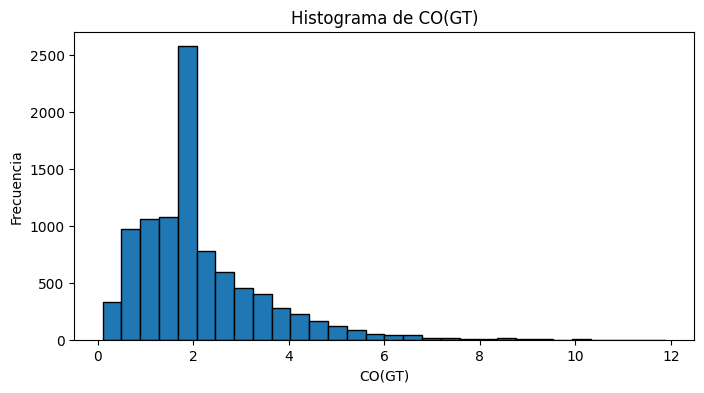

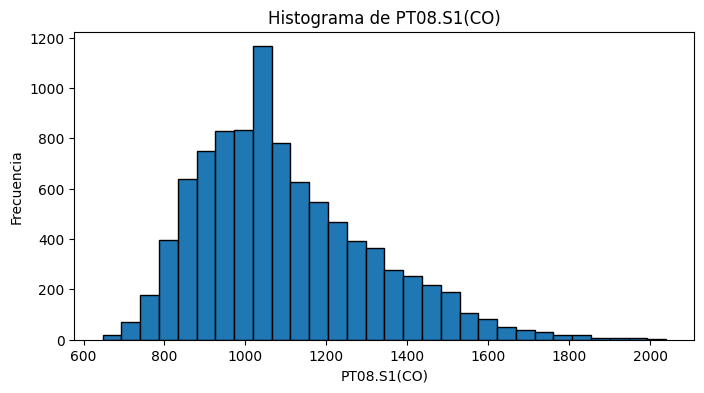

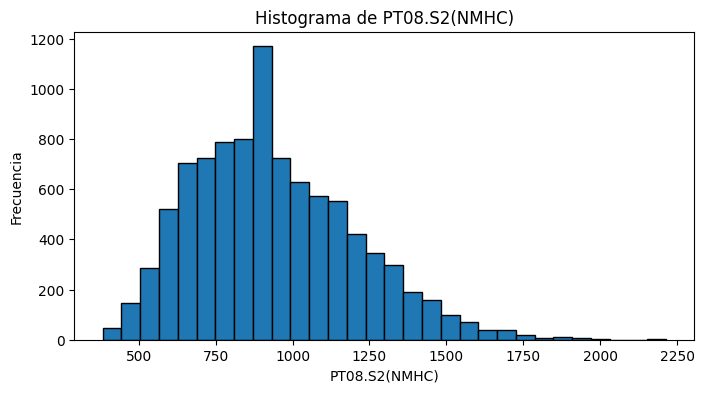

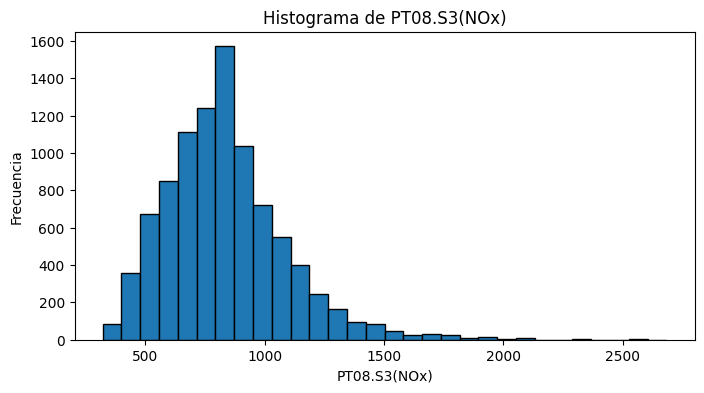

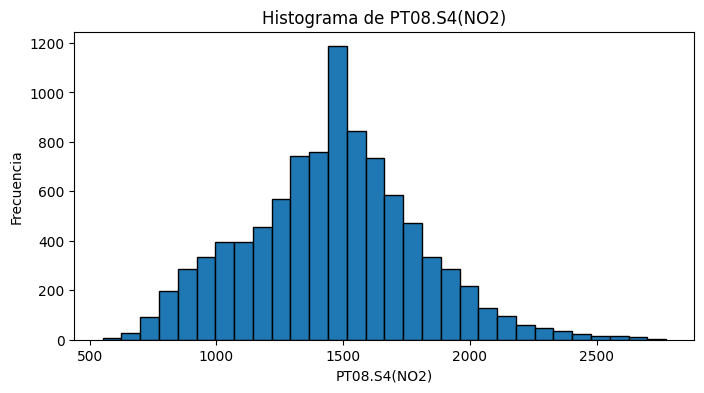

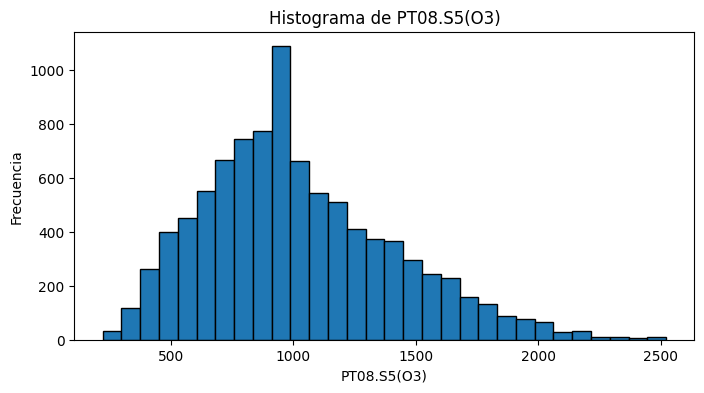

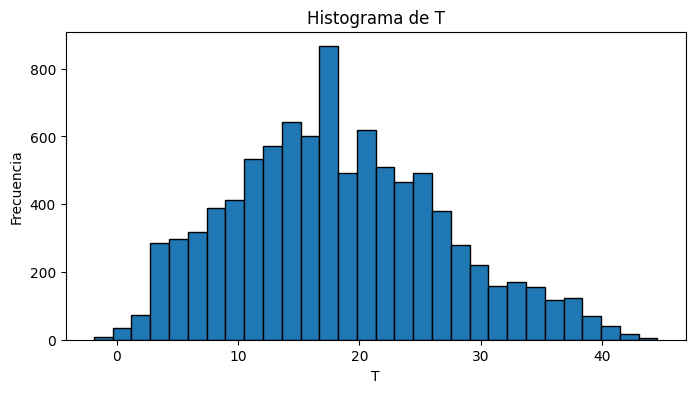

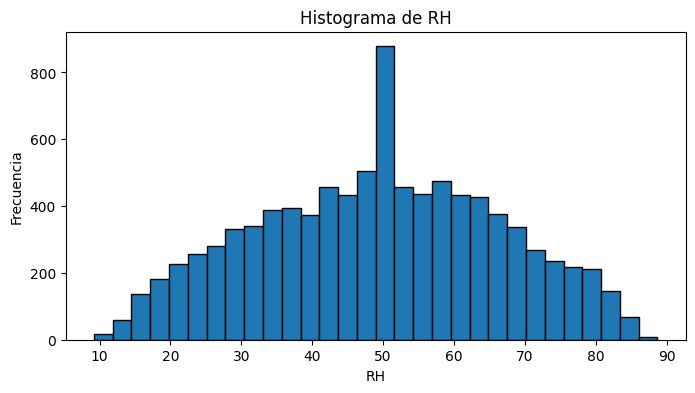

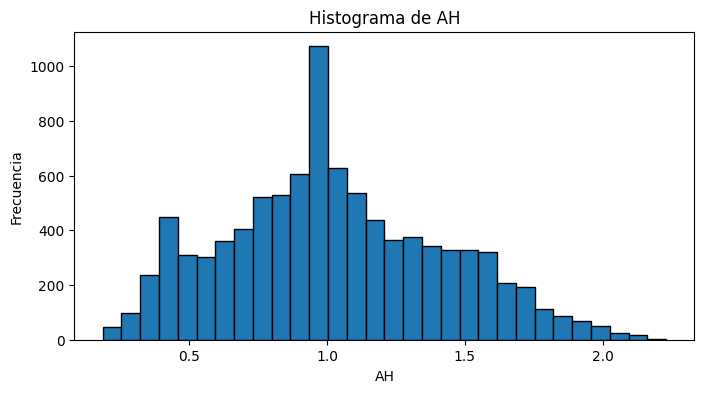

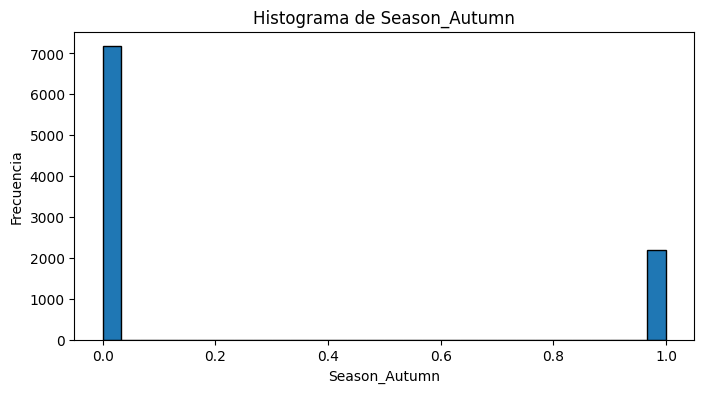

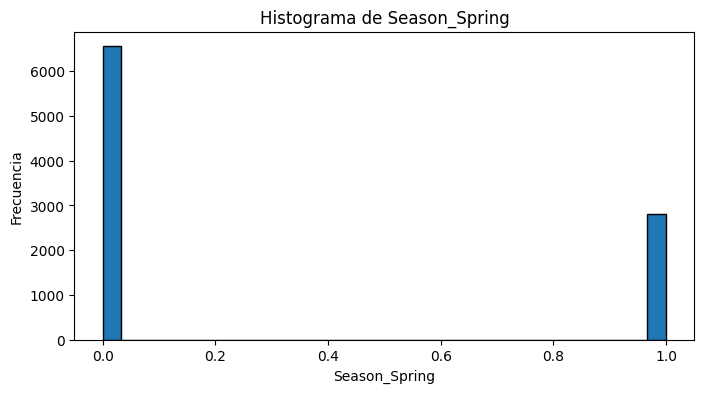

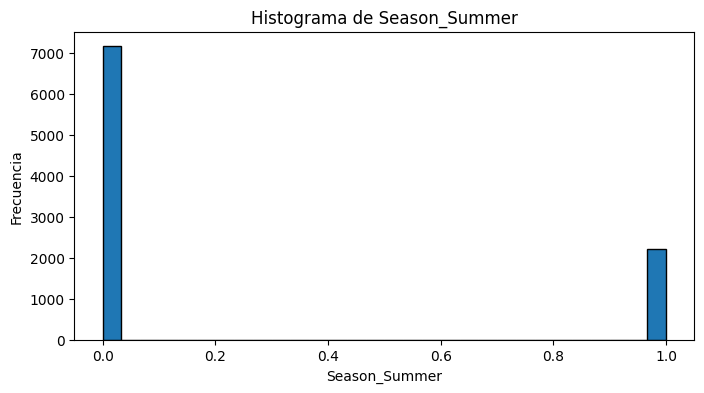

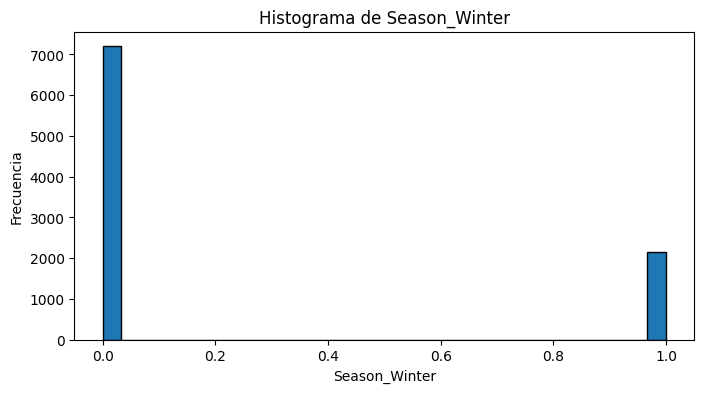

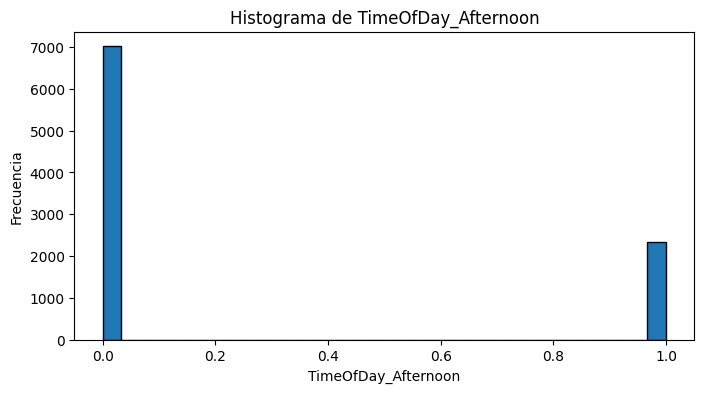

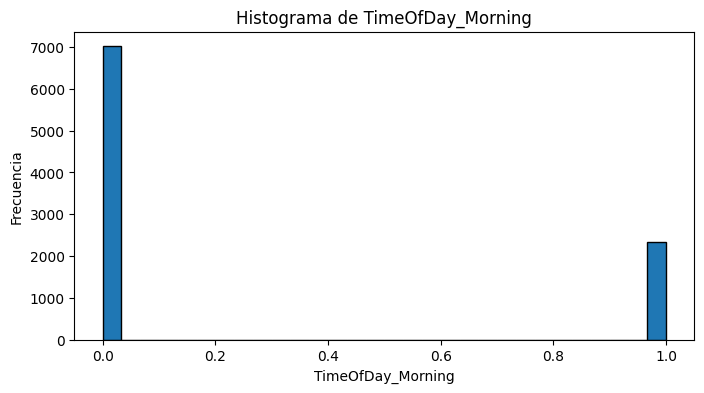

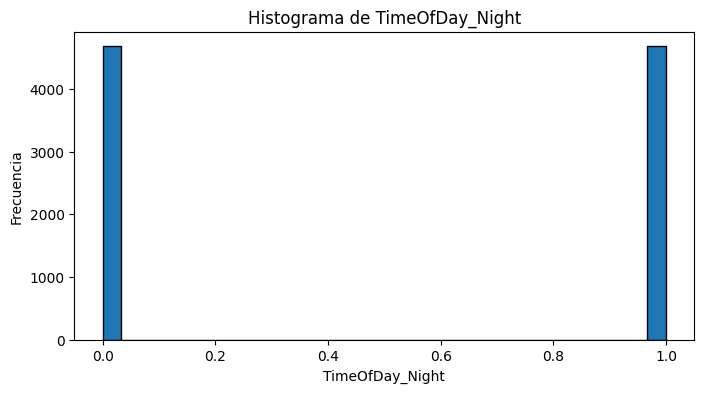

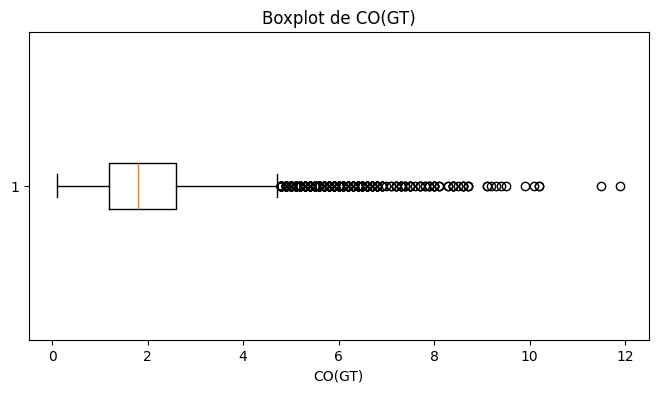

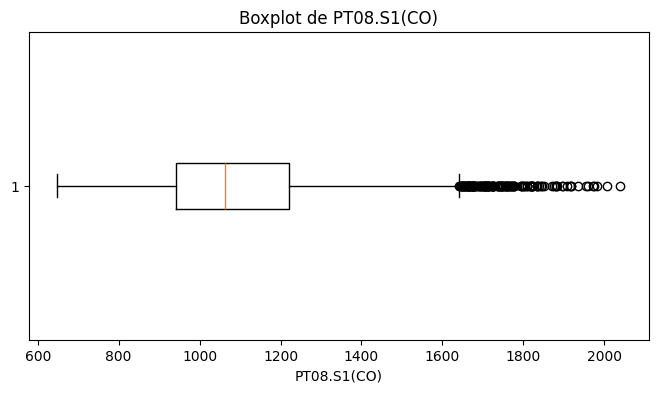

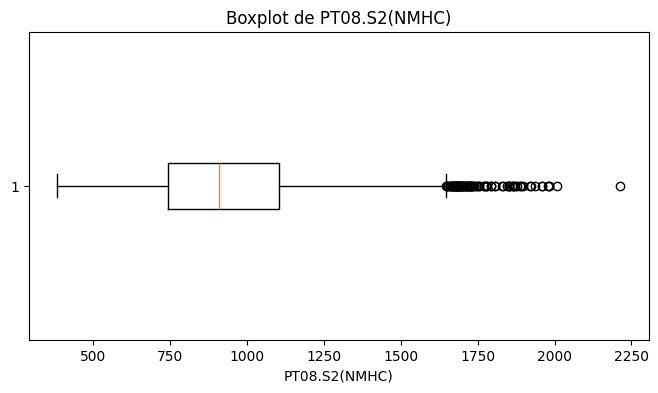

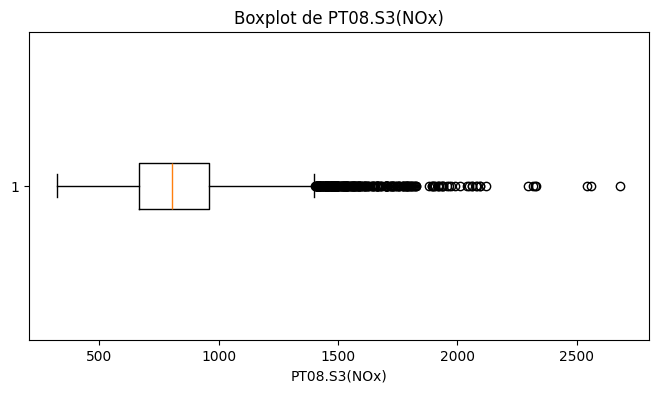

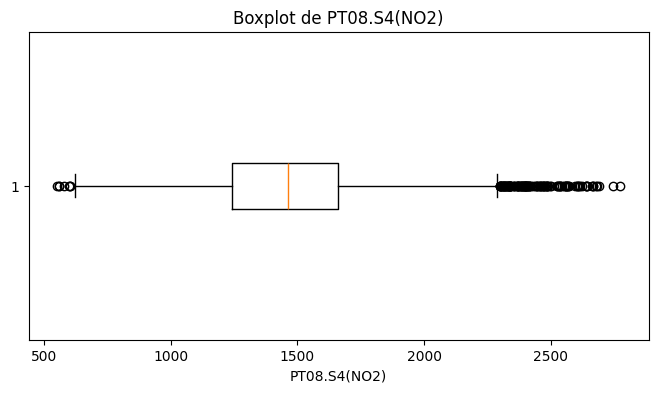

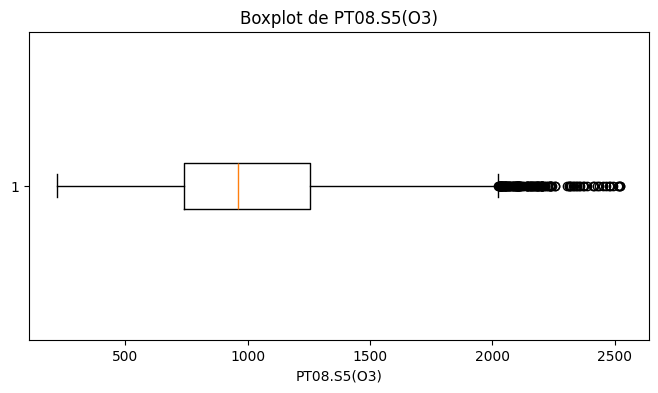

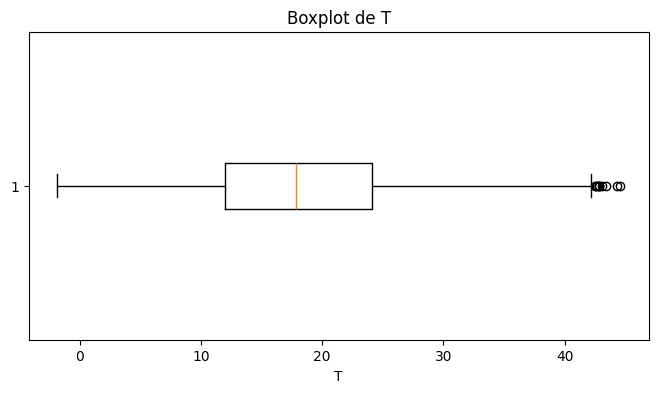

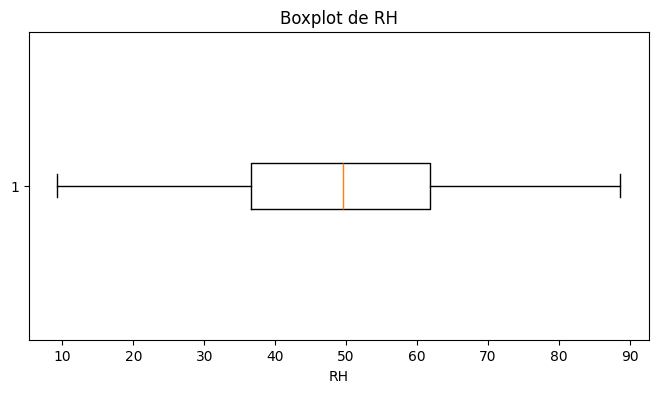

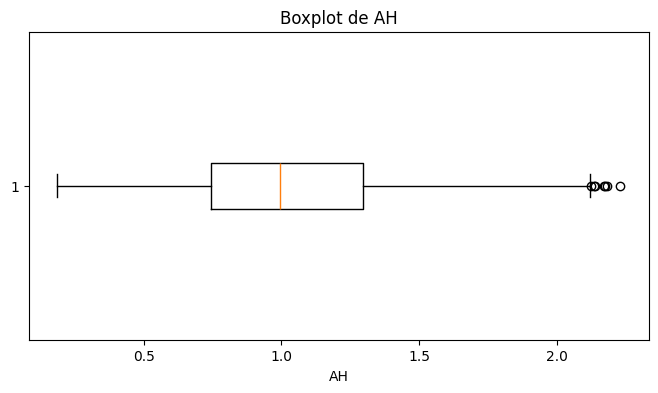

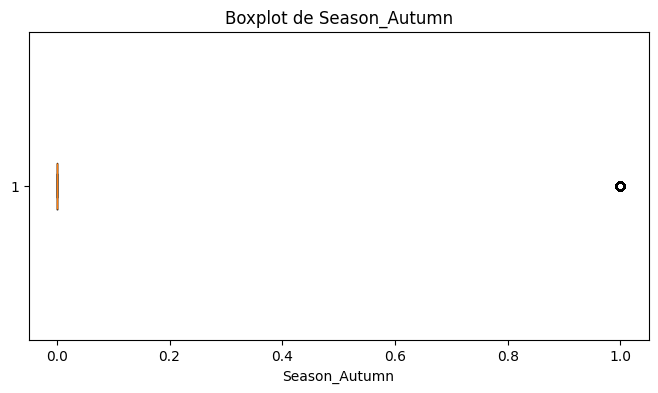

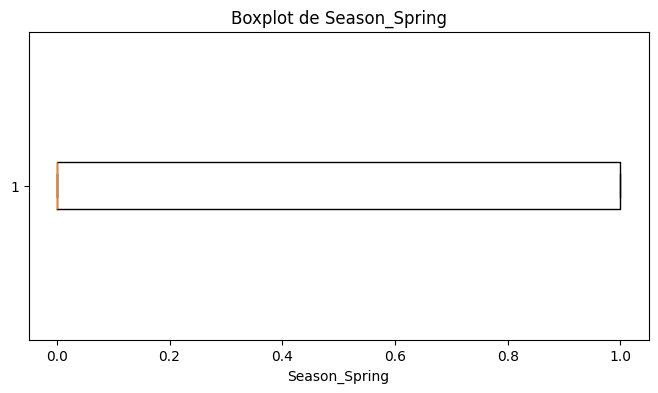

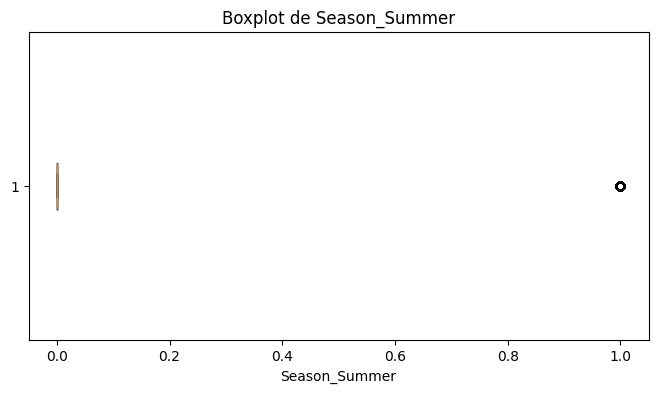

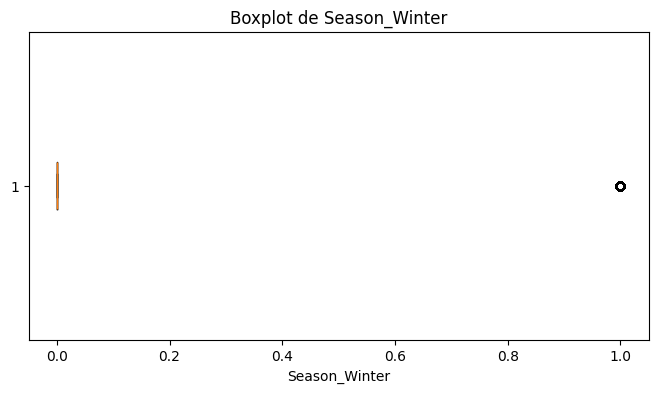

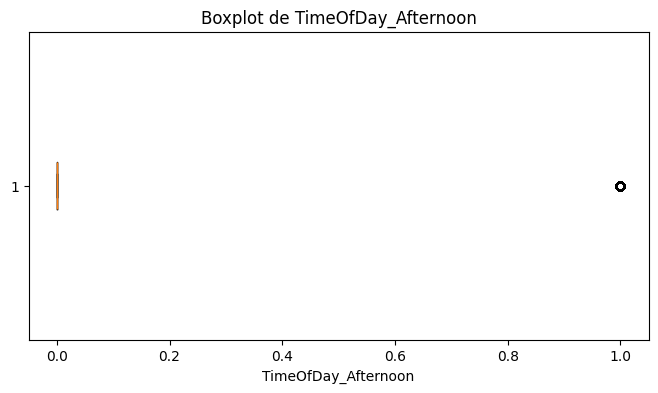

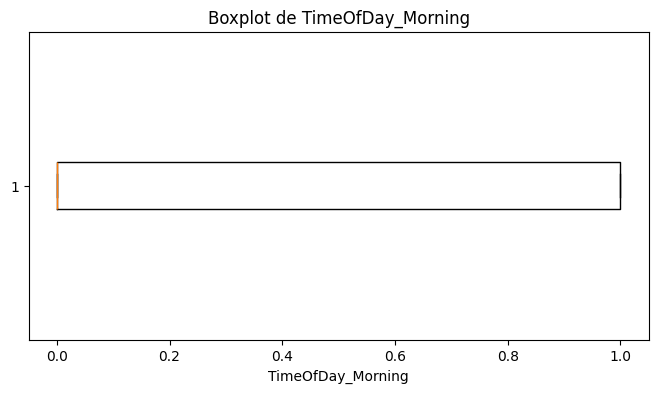

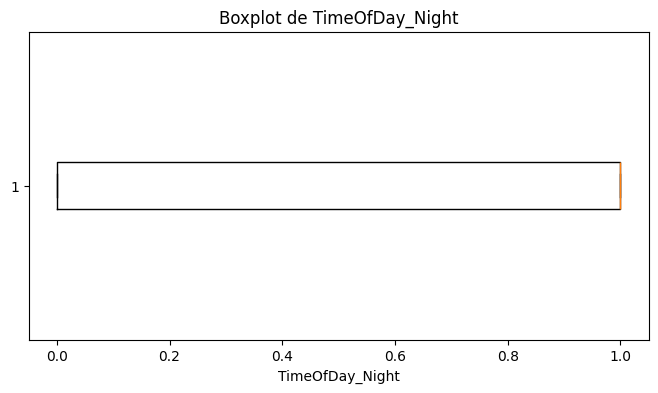

In [20]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_dummies.select_dtypes(include=['float64', 'int64']).columns

# Histogramas
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df_dummies[col], bins=30, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_dummies[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

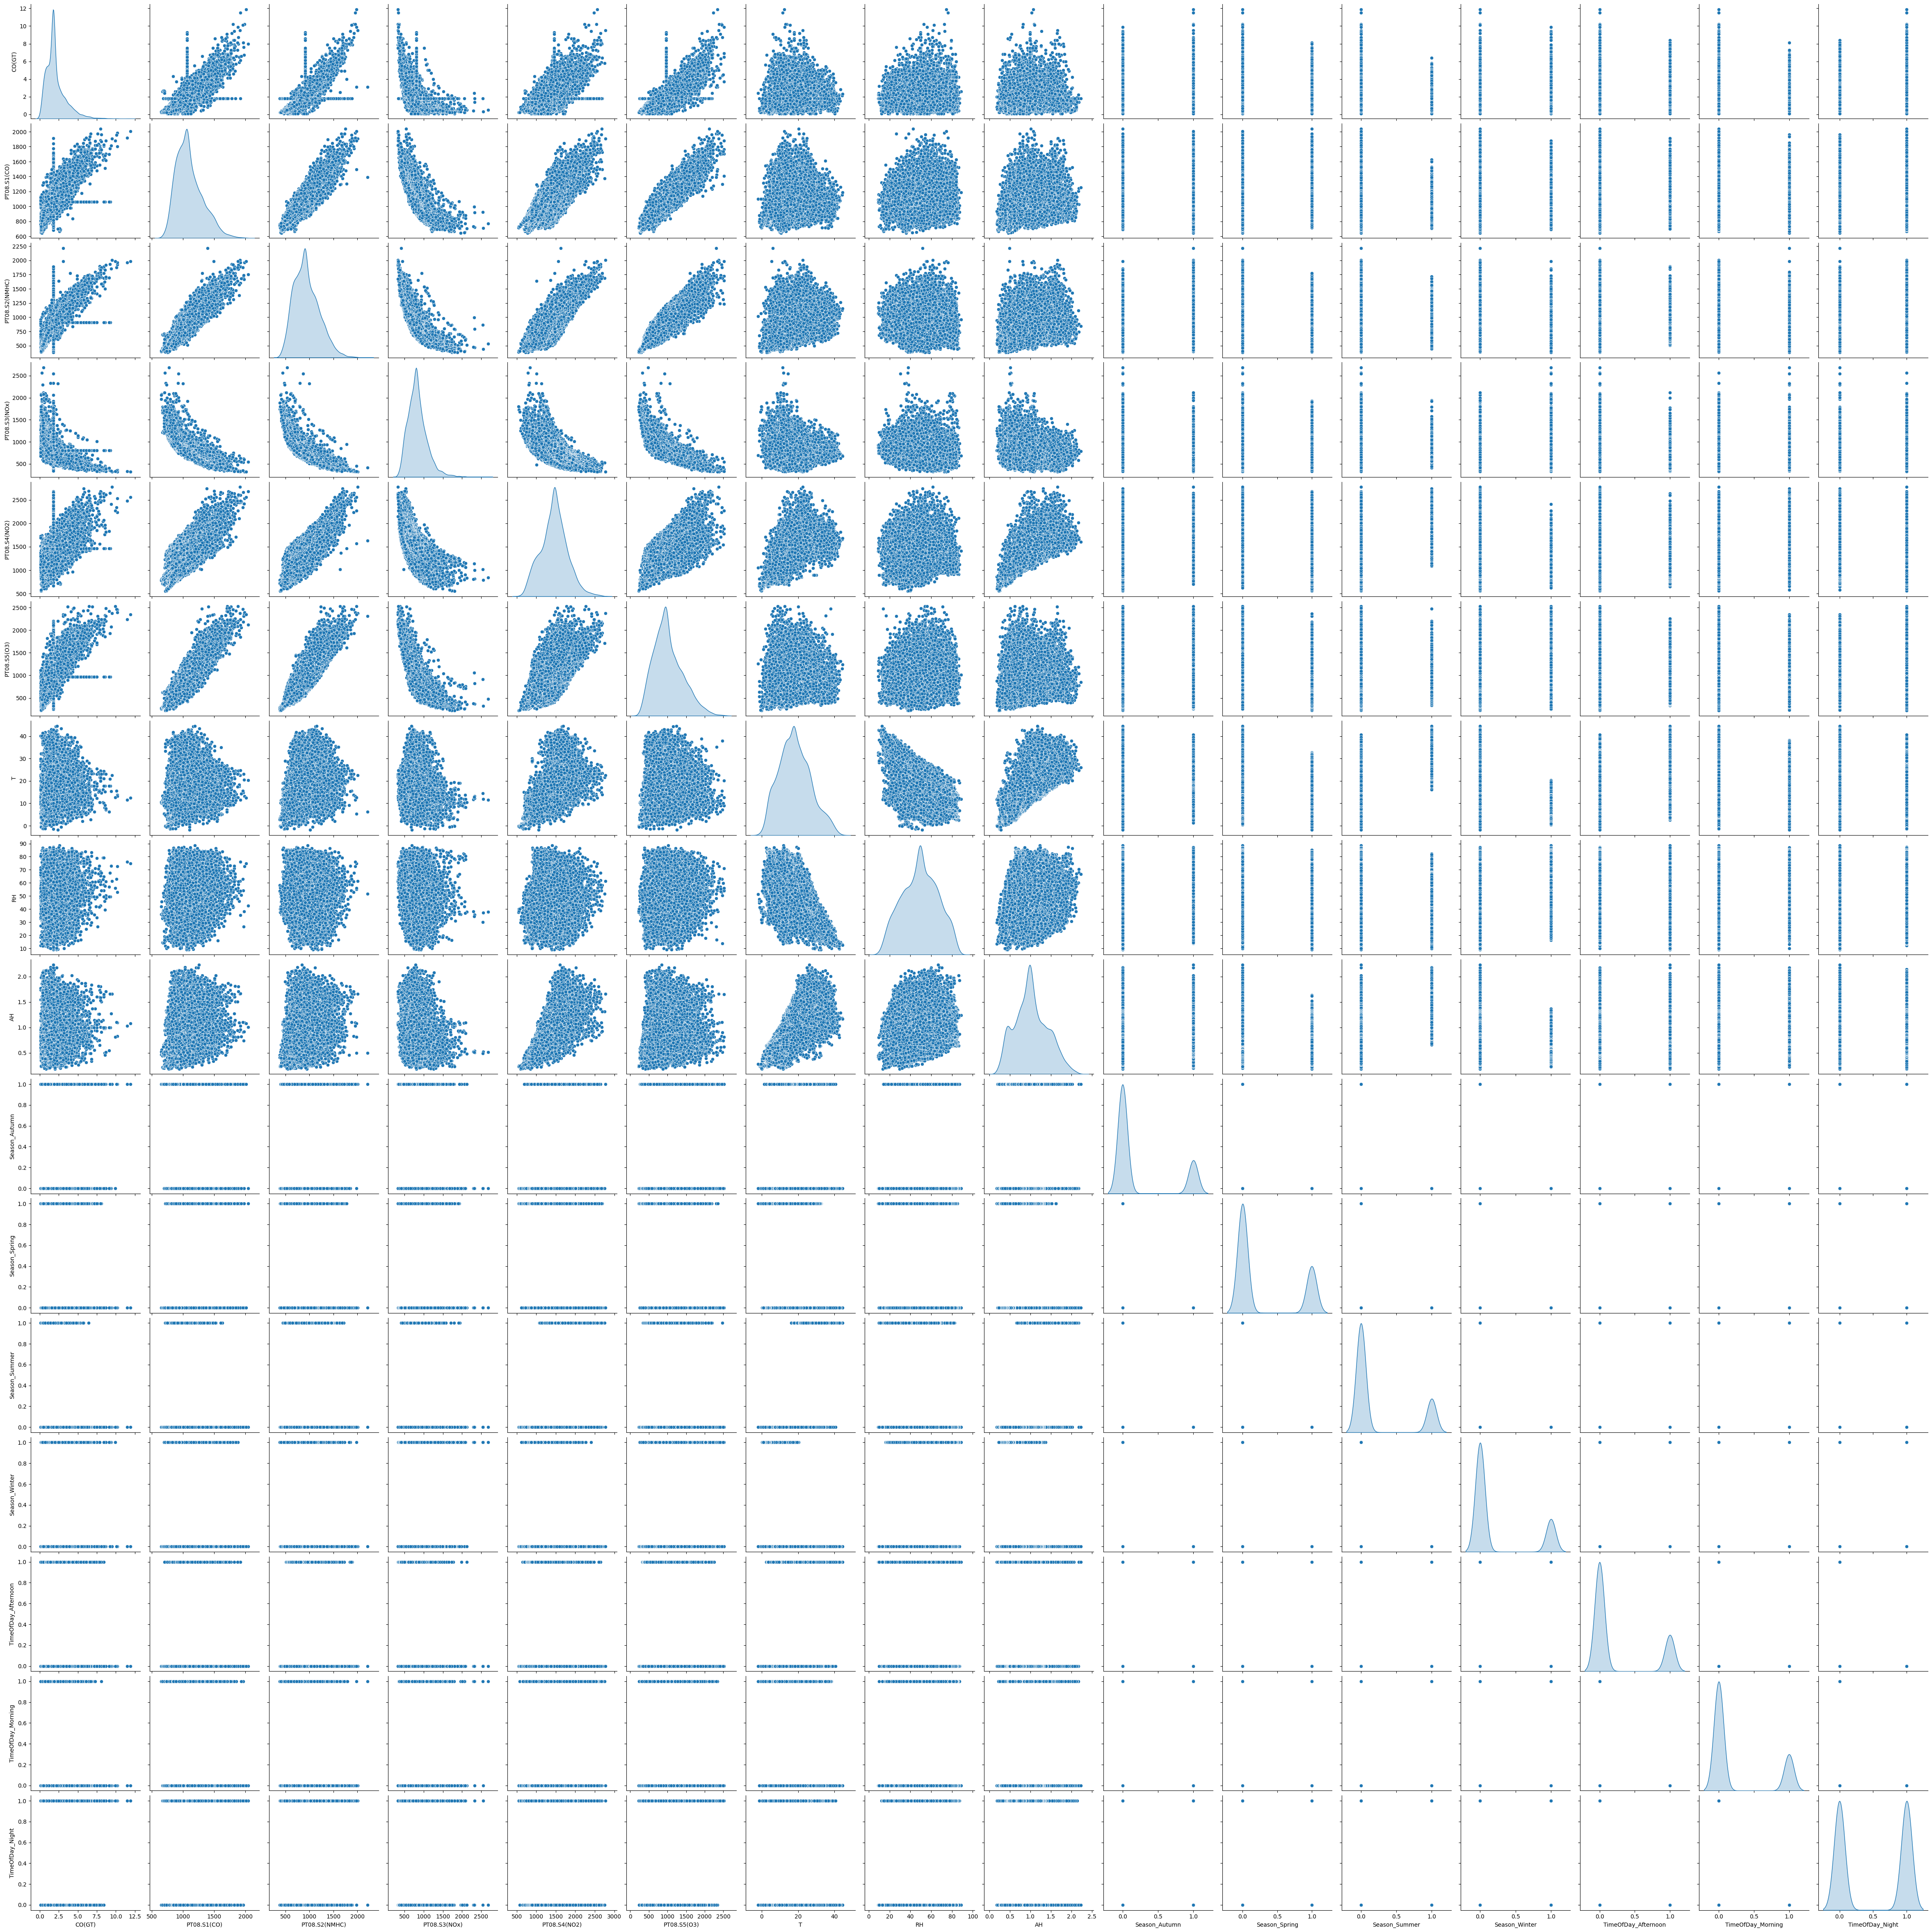

In [50]:
sns.pairplot(df_dummies, diag_kind='kde', height=3, aspect=1)

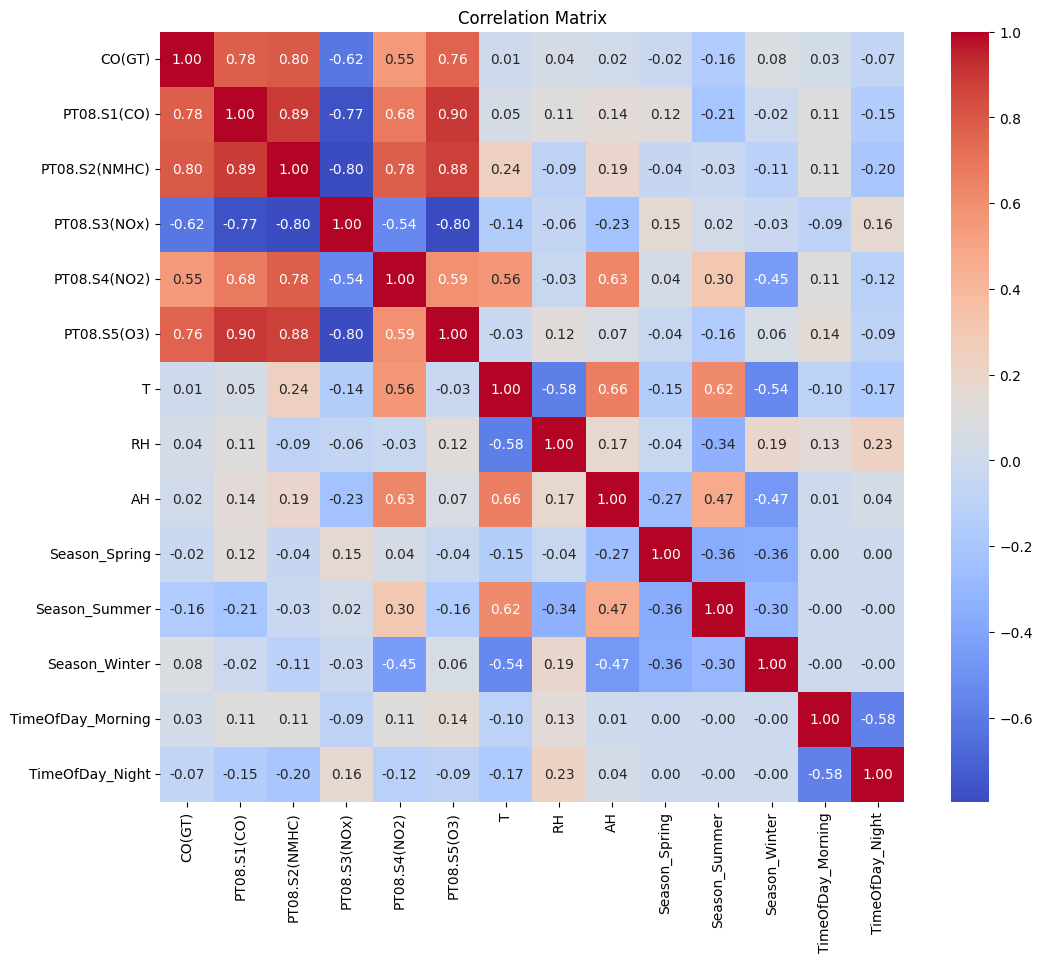

In [21]:
#@title Matriz de correlación

#Armo df_dummies con drop first True


df_dummies = pd.get_dummies(df, columns=['Season', 'TimeOfDay'], drop_first=True).astype(float)
df_corr = df_dummies.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [24]:
correlation_target = df_corr['CO(GT)'].sort_values(ascending=False)
print(correlation_target)

CO(GT)               1.000000
PT08.S2(NMHC)        0.795959
PT08.S1(CO)          0.776948
PT08.S5(O3)          0.763513
PT08.S4(NO2)         0.548481
Season_Winter        0.077990
RH                   0.041137
TimeOfDay_Morning    0.029218
AH                   0.022864
T                    0.006049
Season_Spring       -0.019623
TimeOfDay_Night     -0.066134
Season_Summer       -0.158059
PT08.S3(NOx)        -0.619318
Name: CO(GT), dtype: float64


## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

1. Limpieza:
- Missing values y outliers: los valores faltantes fueron imputados con la mediana; los outliers no se tocaron puesto que no son lecturas ilógicas

2. Variables categóricas: creé dos (hora del día y estación del año); ambas fueron codificadas como dummies

In [31]:
#Separo X e y CON ESTACION + HORA DEL DIA

X = df_dummies[['PT08.S1(CO)', 'PT08.S2(NMHC)',	'PT08.S3(NOx)', 'PT08.S4(NO2)',	'PT08.S5(O3)', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'TimeOfDay_Morning', 'TimeOfDay_Night']]
y = df_dummies['CO(GT)']

In [35]:
#Separo X e y SIN ESTACION + HORA DEL DÍA

X = df_dummies[['PT08.S1(CO)', 'PT08.S2(NMHC)',	'PT08.S3(NOx)', 'PT08.S4(NO2)',	'PT08.S5(O3)']]
y = df_dummies['CO(GT)']

In [36]:
#@title Primero divido en train/test en 70-30

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Crear el estandarizador
scaler = StandardScaler()

# Ajustar solo sobre el entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar también el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con datos estandarizados
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir
y_pred = model.predict(X_test_scaled)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Evaluación en el set de entrenamiento ---
y_train_pred = model.predict(X_train_scaled)

print("== Entrenamiento ==")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))

# --- Evaluación en el set de prueba ---
y_test_pred = model.predict(X_test_scaled)

print("\n== Testeo ==")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))

== Entrenamiento ==
MAE: 0.4737284570711009
R²: 0.6725301487474644
MSE: 0.5557333314519592

== Testeo ==
MAE: 0.491242794643375
R²: 0.679230737439021
MSE: 0.600682456490242


**Conclusión sobre los errores**

El modelo presenta un error absoluto medio (MAE) de aproximadamente 0.48 mg/m³, lo que representa un error relativo de ~25% considerando que los valores típicos de CO rondan los 2 mg/m³ -como se vio en las dispersiones-.

Aunque este error es aceptable para un entorno con sensores baratos y datos ambientales ruidosos, también evidencia que existen limitaciones inherentes: parte de la variabilidad no puede ser explicada solo con los datos disponibles, y los outliers o condiciones atípicas amplifican las discrepancias. Esto sugiere que para mejorar la precisión, podrían explorarse modelos más complejos o incluir variables adicionales (como condiciones meteorológicas más detalladas).


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

In [39]:
# Crear un DataFrame para visualizar coeficientes y su importancia
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

Feature  Coefficient
1  PT08.S2(NMHC)     0.884556
0    PT08.S1(CO)     0.373020
2   PT08.S3(NOx)     0.200572
4    PT08.S5(O3)     0.174735
3   PT08.S4(NO2)    -0.231004


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

Variables más importantes:

1. PT08.S2(NMHC)
2. PT08.S1(CO)

Sí coinciden con el EDA.

No obstante, aunque el rendimiento es aceptable, no es perfecto, y esto podría deberse a tres razones:

a) Limitaciones de los sensores baratos:

Los sensores tipo PT08.X tienen:

Cross-sensitivity (se confunden con otros gases),
Errores de medición,
Y deriva (pierden precisión con el tiempo).
Eso mete ruido natural que limita la precisión.

b) Naturaleza del problema:
La contaminación atmosférica está influenciada por muchos factores complejos:

Viento,
Altura geográfica,
Emisiones puntuales no medidas,
Condiciones meteorológicas cambiantes.

Estos factores no siempre están representados en tus datos, lo que lleva a que haya parte de la varianza que no podés explicar solo con los sensores disponibles.

c) Limitación del modelo lineal:
La relación entre sensores y CO real podría no ser 100% lineal.

Un modelo lineal no captura bien interacciones complejas o relaciones no lineales.


**CONCLUSIÓN**

1. El modelo logra una predicción sólida:
La regresión lineal entrenada con las lecturas de sensores baratos y datos ambientales alcanza un R² cercano a 0.68, lo que indica que explica aproximadamente el 70% de la variabilidad del CO real. Esto demuestra que el modelo es capaz de predecir de forma bastante precisa a partir de datos ruidosos y económicos.

2. Los sensores baratos complementan su información:
Aunque el sensor específico de CO (PT08.S1(CO)) aporta valor, el modelo mostró que otros sensores, especialmente PT08.S2(NMHC), son aún más influyentes. Esto confirma que los contaminantes tienden a aparecer juntos y que la combinación de varios sensores mejora la estimación.

3. La calidad del aire es un problema complejo:
El hecho de que el R² no se acerque a 1 refleja la complejidad inherente de la contaminación ambiental, donde múltiples factores externos (como clima, viento o fuentes de emisión no medidas) influyen y no siempre están capturados en los datos disponibles.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  
